<a href="https://colab.research.google.com/github/locoblueog/locoblueog/blob/main/Week1/TMDL_Assignment_Test_Code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
import pandas as pd

# Mount Google Drive
drive.mount('/content/drive')

# Define the file path (assuming the file is in the root of your Google Drive)
file_path = '/content/drive/My Drive/Colab Notebooks/lending_club_loan_two.csv'

# Load the dataset
df = pd.read_csv(file_path)

# Display basic info
df.info()

Mounted at /content/drive
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 396030 entries, 0 to 396029
Data columns (total 27 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   loan_amnt             396030 non-null  float64
 1   term                  396030 non-null  object 
 2   int_rate              396030 non-null  float64
 3   installment           396030 non-null  float64
 4   grade                 396030 non-null  object 
 5   sub_grade             396030 non-null  object 
 6   emp_title             373103 non-null  object 
 7   emp_length            377729 non-null  object 
 8   home_ownership        396030 non-null  object 
 9   annual_inc            396030 non-null  float64
 10  verification_status   396030 non-null  object 
 11  issue_d               396030 non-null  object 
 12  loan_status           396030 non-null  object 
 13  purpose               396030 non-null  object 
 14  title                 3942

In [2]:
# Display the columns in the dataset
print(df.columns)

Index(['loan_amnt', 'term', 'int_rate', 'installment', 'grade', 'sub_grade',
       'emp_title', 'emp_length', 'home_ownership', 'annual_inc',
       'verification_status', 'issue_d', 'loan_status', 'purpose', 'title',
       'dti', 'earliest_cr_line', 'open_acc', 'pub_rec', 'revol_bal',
       'revol_util', 'total_acc', 'initial_list_status', 'application_type',
       'mort_acc', 'pub_rec_bankruptcies', 'address'],
      dtype='object')


In [3]:
print(df.head)

<bound method NDFrame.head of         loan_amnt        term  int_rate  installment grade sub_grade  \
0         10000.0   36 months     11.44       329.48     B        B4   
1          8000.0   36 months     11.99       265.68     B        B5   
2         15600.0   36 months     10.49       506.97     B        B3   
3          7200.0   36 months      6.49       220.65     A        A2   
4         24375.0   60 months     17.27       609.33     C        C5   
...           ...         ...       ...          ...   ...       ...   
396025    10000.0   60 months     10.99       217.38     B        B4   
396026    21000.0   36 months     12.29       700.42     C        C1   
396027     5000.0   36 months      9.99       161.32     B        B1   
396028    21000.0   60 months     15.31       503.02     C        C2   
396029     2000.0   36 months     13.61        67.98     C        C2   

                       emp_title emp_length home_ownership  annual_inc  ...  \
0                      Mar

In [4]:
df = df.drop(['grade', 'emp_length', 'emp_title', 'issue_d', 'title', 'address', 'earliest_cr_line', 'term'], axis=1)

In [6]:
print(df.columns)
print(df.head)

Index(['loan_amnt', 'int_rate', 'installment', 'sub_grade', 'home_ownership',
       'annual_inc', 'verification_status', 'loan_status', 'purpose', 'dti',
       'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc',
       'initial_list_status', 'application_type', 'mort_acc',
       'pub_rec_bankruptcies'],
      dtype='object')
<bound method NDFrame.head of         loan_amnt  int_rate  installment sub_grade home_ownership  annual_inc  \
0         10000.0     11.44       329.48        B4           RENT    117000.0   
1          8000.0     11.99       265.68        B5       MORTGAGE     65000.0   
2         15600.0     10.49       506.97        B3           RENT     43057.0   
3          7200.0      6.49       220.65        A2           RENT     54000.0   
4         24375.0     17.27       609.33        C5       MORTGAGE     55000.0   
...           ...       ...          ...       ...            ...         ...   
396025    10000.0     10.99       217.38        B4           R

In [10]:
median_loan_amnt = df['loan_amnt'].median()

print(median_loan_amnt)

fillna_loan_amnt = df['loan_amnt'].fillna(median_loan_amnt)

print(fillna_loan_amnt)

print(df['loan_amnt'].isnull().sum())

12000.0
0         10000.0
1          8000.0
2         15600.0
3          7200.0
4         24375.0
           ...   
396025    10000.0
396026    21000.0
396027     5000.0
396028    21000.0
396029     2000.0
Name: loan_amnt, Length: 396030, dtype: float64
0


In [ ]:
# Fill missing values for numerical columns with the median
numerical_cols = df.select_dtypes(include=['float64', 'int64']).columns
df[numerical_cols] = df[numerical_cols].fillna(df[numerical_cols].median())

# Fill missing values for categorical columns with the mode
categorical_cols = df.select_dtypes(include=['object']).columns
df[categorical_cols] = df[categorical_cols].fillna(df[categorical_cols].mode().iloc[0])

# Check if there are any missing values left
print("Missing values after imputation:")
print(df.isnull().sum())

Missing values after imputation:
loan_amnt               0
term                    0
int_rate                0
installment             0
grade                   0
emp_length              0
home_ownership          0
annual_inc              0
verification_status     0
loan_status             0
purpose                 0
title                   0
dti                     0
earliest_cr_line        0
open_acc                0
pub_rec                 0
revol_bal               0
revol_util              0
total_acc               0
initial_list_status     0
application_type        0
mort_acc                0
pub_rec_bankruptcies    0
dtype: int64


In [ ]:
df = pd.read_csv(file_path, nrows=10000)  # You can change the number of rows

# Perform one-hot encoding for categorical columns
df_encoded = pd.get_dummies(df, drop_first=True)

# Check the updated dataset columns
print("Columns after one-hot encoding:")
print(df_encoded.columns)

# Display the first few rows of the encoded dataset
print(df_encoded.head())

Columns after one-hot encoding:
Index(['loan_amnt', 'int_rate', 'installment', 'annual_inc', 'dti', 'open_acc',
       'pub_rec', 'revol_bal', 'revol_util', 'total_acc',
       ...
       'address_Unit 9833 Box 1561\nDPO AP 11650',
       'address_Unit 9834 Box 0760\nDPO AE 70466',
       'address_Unit 9869 Box 4512\nDPO AE 05113',
       'address_Unit 9885 Box 6140\nDPO AP 22690',
       'address_Unit 9898 Box 8053\nDPO AE 93700',
       'address_Unit 9915 Box 2249\nDPO AE 29597',
       'address_Unit 9917 Box 4083\nDPO AE 30723',
       'address_Unit 9938 Box 9116\nDPO AE 11650',
       'address_Unit 9965 Box 3120\nDPO AE 00813',
       'address_Unit 9977 Box 3646\nDPO AP 86630'],
      dtype='object', length=19653)
   loan_amnt  int_rate  installment  annual_inc    dti  open_acc  pub_rec  \
0    10000.0     11.44       329.48    117000.0  26.24      16.0      0.0   
1     8000.0     11.99       265.68     65000.0  22.05      17.0      0.0   
2    15600.0     10.49       506.97     4

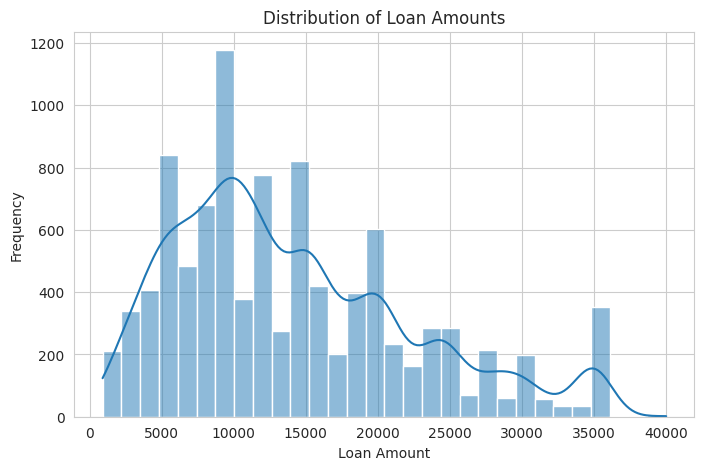

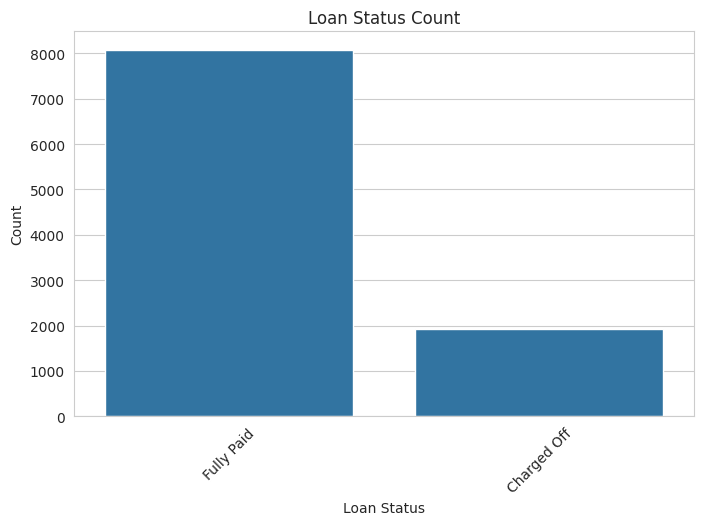

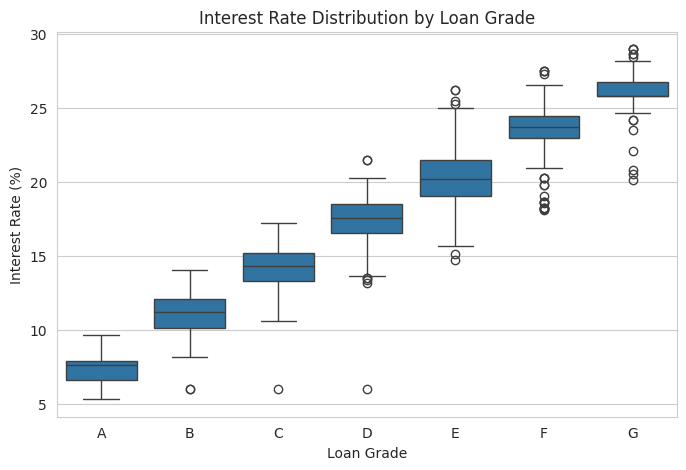

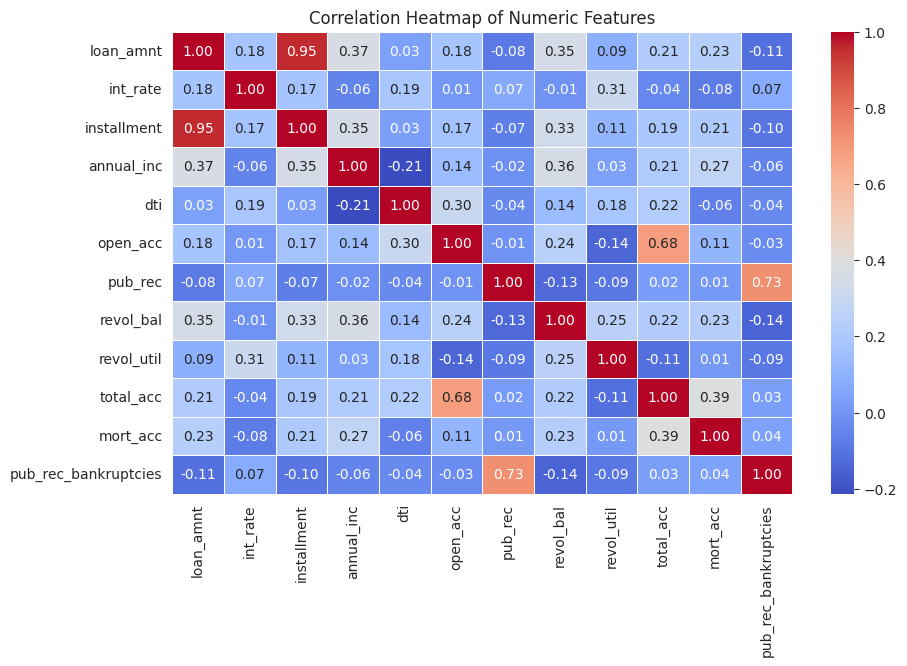

In [ ]:
# Set style for seaborn
sns.set_style("whitegrid")

# 1. Histogram of loan amounts
plt.figure(figsize=(8, 5))
sns.histplot(df["loan_amnt"], bins=30, kde=True)
plt.title("Distribution of Loan Amounts")
plt.xlabel("Loan Amount")
plt.ylabel("Frequency")
plt.show()

# 2. Bar plot of loan status counts
plt.figure(figsize=(8, 5))
sns.countplot(x=df["loan_status"], order=df["loan_status"].value_counts().index)
plt.xticks(rotation=45)
plt.title("Loan Status Count")
plt.xlabel("Loan Status")
plt.ylabel("Count")
plt.show()

# 3. Boxplot of interest rate by loan grade
plt.figure(figsize=(8, 5))
sns.boxplot(x="grade", y="int_rate", data=df, order=sorted(df["grade"].unique()))
plt.title("Interest Rate Distribution by Loan Grade")
plt.xlabel("Loan Grade")
plt.ylabel("Interest Rate (%)")
plt.show()

# 4. Correlation heatmap of numerical features
num_cols = df.select_dtypes(include=["float64"]).columns  # Select only numeric columns
plt.figure(figsize=(10, 6))
sns.heatmap(df[num_cols].corr(), annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap of Numeric Features")
plt.show()

In [ ]:
print(df)

df.drop(['address', 'emp_title', 'grade'], axis=1)


      loan_amnt        term  int_rate  installment grade sub_grade  \
0       10000.0   36 months     11.44       329.48     B        B4   
1        8000.0   36 months     11.99       265.68     B        B5   
2       15600.0   36 months     10.49       506.97     B        B3   
3        7200.0   36 months      6.49       220.65     A        A2   
4       24375.0   60 months     17.27       609.33     C        C5   
...         ...         ...       ...          ...   ...       ...   
9995    12575.0   36 months     19.52       464.27     E        E2   
9996     5000.0   36 months     10.16       161.72     B        B1   
9997    20000.0   36 months      7.90       625.81     A        A4   
9998    25075.0   60 months     17.86       634.84     D        D5   
9999    12000.0   36 months     22.78       463.15     F        F2   

                    emp_title emp_length home_ownership  annual_inc  ...  \
0                   Marketing  10+ years           RENT    117000.0  ...   
1      

,loan_amnt,term,int_rate,installment,sub_grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,...,earliest_cr_line,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies
0,10000.0,36 months,11.44,329.48,B4,10+ years,RENT,117000.0,Not Verified,Jan-2015,...,Jun-1990,16.0,0.0,36369.0,41.8,25.0,w,INDIVIDUAL,0.0,0.0
1,8000.0,36 months,11.99,265.68,B5,4 years,MORTGAGE,65000.0,Not Verified,Jan-2015,...,Jul-2004,17.0,0.0,20131.0,53.3,27.0,f,INDIVIDUAL,3.0,0.0
2,15600.0,36 months,10.49,506.97,B3,< 1 year,RENT,43057.0,Source Verified,Jan-2015,...,Aug-2007,13.0,0.0,11987.0,92.2,26.0,f,INDIVIDUAL,0.0,0.0
3,7200.0,36 months,6.49,220.65,A2,6 years,RENT,54000.0,Not Verified,Nov-2014,...,Sep-2006,6.0,0.0,5472.0,21.5,13.0,f,INDIVIDUAL,0.0,0.0
4,24375.0,60 months,17.27,609.33,C5,9 years,MORTGAGE,55000.0,Verified,Apr-2013,...,Mar-1999,13.0,0.0,24584.0,69.8,43.0,f,INDIVIDUAL,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,12575.0,36 months,19.52,464.27,E2,2 years,MORTGAGE,35256.0,Not Verified,Jul-2014,...,Nov-2003,9.0,0.0,11001.0,25.1,11.0,f,INDIVIDUAL,1.0,0.0
9996,5000.0,36 months,10.16,161.72,B1,8 years,MORTGAGE,38000.0,Not Verified,Oct-2012,...,Apr-2003,5.0,0.0,486.0,15.7,11.0,f,INDIVIDUAL,1.0,0.0
9997,20000.0,36 months,7.90,625.81,A4,4 years,RENT,113000.0,Not Verified,Dec-2012,...,Sep-1998,13.0,0.0,20099.0,55.2,23.0,w,INDIVIDUAL,0.0,0.0
9998,25075.0,60 months,17.86,634.84,D5,1 year,OWN,132000.0,Source Verified,Apr-2015,...,May-1997,11.0,0.0,43316.0,76.6,28.0,w,INDIVIDUAL,5.0,0.0


Index(['loan_amnt', 'term', 'int_rate', 'installment', 'grade', 'sub_grade',
       'emp_title', 'emp_length', 'home_ownership', 'annual_inc',
       'verification_status', 'issue_d', 'loan_status', 'purpose', 'title',
       'dti', 'earliest_cr_line', 'open_acc', 'pub_rec', 'revol_bal',
       'revol_util', 'total_acc', 'initial_list_status', 'application_type',
       'mort_acc', 'pub_rec_bankruptcies', 'address'],
      dtype='object')


<Axes: xlabel='installment'>

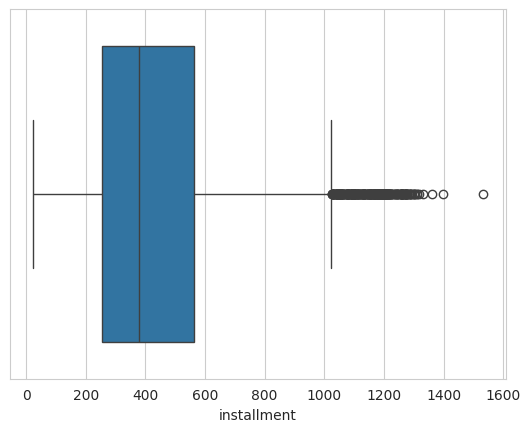

In [ ]:
print(df.columns)

import seaborn as sns
sns.boxplot(x=df['installment'])